In [2]:
# 이진 분류  IMDB  영화 리뷰데이터  긍정 부정
from keras.datasets import imdb
(train_data, train_label),(test_data, test_label) =  imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [6]:
# num_words = 10000 은 자주 사용하는 단어 10000개만 사용
# train_data 리뷰데이터의 단어 인덱스(단어 시퀀스가 인코딩)
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [7]:
train_label[0]

1

In [11]:
word_index =  imdb.get_word_index()
word_index['fawn']

34701

In [31]:
# 인덱스와 단어를 매핑하도록 뒤집는다
reverse_word_index =  dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩
','.join([reverse_word_index.get(i) for i in train_data[0]])

"the,as,you,with,out,themselves,powerful,lets,loves,their,becomes,reaching,had,journalist,of,lot,from,anyone,to,have,after,out,atmosphere,never,more,room,and,it,so,heart,shows,to,years,of,every,never,going,and,help,moments,or,of,every,chest,visual,movie,except,her,was,several,of,enough,more,with,is,now,current,film,as,you,of,mine,potentially,unfortunately,of,you,than,him,that,with,out,themselves,her,get,for,was,camp,of,you,movie,sometimes,movie,that,with,scary,but,and,to,story,wonderful,that,in,seeing,in,character,to,of,70s,musicians,with,heart,had,shadows,they,of,here,that,with,her,serious,to,have,does,when,from,why,what,have,critics,they,is,you,that,isn't,one,will,very,to,as,itself,with,other,and,in,of,seen,over,landed,for,anyone,of,and,br,show's,to,whether,from,than,out,themselves,history,he,name,half,some,br,of,and,odd,was,two,most,of,mean,for,1,any,an,boat,she,he,should,is,thought,frog,but,of,script,you,not,while,history,he,heart,to,real,at,barrel,but,when,from,one,bit,then,have,t

In [33]:
# 데이터 준비 - 리스트를 신경망에 주입 X  리스트를 텐서로 변경
# 1 .같은 길이가 되도록 리스트에 패딩을 추가한후 텐서로 변환
# 2. 리스트를 원핫 인코딩 0과 1의 백터로 변환
# 1번이나 또는 2번과 같은방법으로 생성된 데이터를 네트웍의 첫번째 층으로 설정

In [36]:
# 2번째 방법인 원핫 벡터로 변경
import numpy as np
# 크기를(len(sequences) , dimension) 이고 모든 원소가 0
def vec_sequence(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension) )
  for i , sequence in enumerate(sequences):
    results[i,sequence] = 1  # 특정 인덱스의 위치를 1로 만든다
  return results

x_train =  vec_sequence(train_data)
x_test = vec_sequence(test_data)

In [44]:
x_train,len(x_train)

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]), 25000)

In [39]:
#레이블을 벡터형태로 변경
y_train =  np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [41]:
y_train,train_label

(array([1., 0., 0., ..., 0., 1., 0.], dtype=float32),
 array([1, 0, 0, ..., 0, 1, 0]))

In [42]:
# 신경망 모델 만들기
# 입력데이터 : 벡터 / 출력은 스칼라(0, 1) --> 네트웍은 relu활성화 함수를 사용한 완전연결층 Dense를 이용해서 층을 쌓는모델

In [54]:
from keras import models, layers,optimizers,losses,metrics
model =  models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [55]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy']
              )

In [52]:
# model.compile(optimizer='rmsprop',
#               loss = losses.binary_crossentropy,
#               metrics=[metrics.accuracy]
#               )

In [56]:
x_val =  x_train[:10000]
partial_x_train =  x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

In [58]:
# 512개씩 샘플링하는 미니배치를 만든다. 20번 에포크
history = model.fit(partial_x_train, partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 93ms/step - loss: 0.5128 - accuracy: 0.7869 - val_loss: 0.3945 - val_accuracy: 0.8572
Epoch 2/20
30/30 [==============================] - 2s 67ms/step - loss: 0.3047 - accuracy: 0.9033 - val_loss: 0.3093 - val_accuracy: 0.8836
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2214 - accuracy: 0.9263 - val_loss: 0.2915 - val_accuracy: 0.8830
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1737 - accuracy: 0.9437 - val_loss: 0.2934 - val_accuracy: 0.8815
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1423 - accuracy: 0.9547 - val_loss: 0.2854 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1142 - accuracy: 0.9659 - val_loss: 0.3087 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0947 - accuracy: 0.9721 - val_loss: 0.3675 - val_accuracy: 0.8733
Epoch 8/20
30

In [62]:
# 에포크가 끝날때마다 10000개의 검증증 샘플 데이터에서 손실과 정확도를 계산
history_dic =  history.history
history_dic.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [63]:
import matplotlib.pyplot as plt

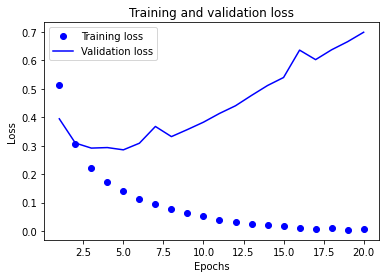

In [66]:
acc = history_dic['accuracy']
val_acc = history_dic['val_loss']
loss = history_dic['loss']
val_loss = history_dic['val_loss']

epochs =  range(1, len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training loss')  # bo는 파란색 점
plt.plot(epochs,val_loss,'b',label='Validation loss')  # b는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

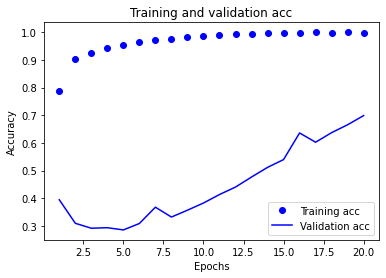

In [67]:
acc = history_dic['accuracy']
val_acc = history_dic['val_loss']
loss = history_dic['loss']
val_loss = history_dic['val_loss']

epochs =  range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')  # bo는 파란색 점
plt.plot(epochs,val_acc,'b',label='Validation acc')  # b는 파란색 실선
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
#위의 그래프를 보면... 훈련데이터에 대해서는 에포크가 증가할수록 손실율 낮고 정확도는 높아진다.--> 경사 하강법을 사용했기 때문에
# 검증데이터는 훈련데이터하고 차이가 많이난다....  과대적합(훈련데이터만 성능이 월등히 뛰어나고 검증은 형편없을때)

In [69]:
model =  models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy']
              )
history = model.fit(x_train, y_train,epochs=4,batch_size=512,validation_data=(x_val,y_val))
result = model.evaluate(x_test,y_test)
result

Epoch 1/4
49/49 [==============================] - 3s 42ms/step - loss: 0.4475 - accuracy: 0.8240 - val_loss: 0.2984 - val_accuracy: 0.8973
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.2586 - accuracy: 0.9095 - val_loss: 0.2034 - val_accuracy: 0.9344
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2006 - accuracy: 0.9282 - val_loss: 0.1639 - val_accuracy: 0.9470
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2987 - accuracy: 0.8807


[0.2987116277217865, 0.8806800246238708]

In [70]:
# 예측
model.predict(x_test)

array([[0.1707074 ],
       [0.9994957 ],
       [0.64956737],
       ...,
       [0.11662355],
       [0.07369015],
       [0.5069169 ]], dtype=float32)

In [71]:
# 어떤 셈플에 대해서는 0과 가깝거나 1과 가깝다고 할수 있지만 0.5 0.6처럼 확신이 부족....

In [72]:
#추가사항
# 은닉층이 2개인데... 한개 또는 3개를 사용해서 검증과 테스트 정확도 확인... 은닉층이 어떤영향을 미치는지
# 은닉층의 유닛또는 뉴런의 개수를 추가하거나 감소  32 64 128
# relu .. tanh : 활성화 함수 조정

In [ ]:
#정리
# 인코딩 방식
# relu방식 dense층을쌓는 방식... 감성분류 자주사용
# 이진분류  sigmoid
# 손실함수 binary_crossentropy
# 옵티마이져 rmsprop(대표적)
# 과대적합 발생 확율이 높다. 항상 훈련세트외에 모니터링 할수 있는 검증데이터를 준비